EDA 1 BIKE DETAILS


In [469]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [470]:
df = pd.read_csv('BIKE DETAILS.csv')

In [471]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [472]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [473]:
# Q1 What is the range of selling prices in the dataset?

min_selling_price = df['selling_price'].min()
max_selling_price = df['selling_price'].max()
print(f"The range of selling prices is from ${min_selling_price} to ${max_selling_price}.\n")


The range of selling prices is from $5000 to $760000.



In [474]:
#Question2  What is the median selling price for bikes in the dataset?

median_selling_price = df['selling_price'].median()
print(f"The median selling price for bikes is ${median_selling_price}")

The median selling price for bikes is $45000.0


In [475]:
#Question3 What is the most common seller type?

most_common_seller_type = df['seller_type'].mode()[0]
print(f"The most common seller type is '{most_common_seller_type}")

The most common seller type is 'Individual


In [476]:
#Question4 How many bikes have driven more than 50,000 kilometers?

bikes_more_than_50k_km = df[df['km_driven'] > 50000].shape[0]
print(f"Number of bikes that have driven more than 50,000 kilometers: {bikes_more_than_50k_km}")

Number of bikes that have driven more than 50,000 kilometers: 170


In [477]:
#Question5 What is the average km_driven value for each ownership type?

avg_km_driven_by_ownership = df.groupby('owner')['km_driven'].mean()
print("Average km_driven value for each ownership :")
print(avg_km_driven_by_ownership)

Average km_driven value for each ownership :
owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [478]:
#Question5 What proportion of bikes are from the year 2015 or older?

bikes_2015_or_older = df[df['year'] <= 2015].shape[0]
proportion_2015_or_older = bikes_2015_or_older / df.shape[0]
proportion_2015_or_older = proportion_2015_or_older * 100
print(f"Proportion of bikes from the year 2015 or older: {proportion_2015_or_older:.2f}%")

Proportion of bikes from the year 2015 or older: 56.64%


In [479]:
#Question6 What is the trend of missing values across the dataset?

missing_values = df.isnull().sum()
print("\nMissing values in each column:\n", missing_values)


Missing values in each column:
 name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


In [480]:
#Question8 What is the highest ex_showroom_price recorded, and for which bike?

highest_showroom_price = df["ex_showroom_price"].max()
bike_highest_price = df[df["ex_showroom_price"] == highest_showroom_price]["name"].values
print("\nHighest ex_showroom_price:", highest_showroom_price)
print("Bike with highest ex_showroom_price:", bike_highest_price)


Highest ex_showroom_price: 1278000.0
Bike with highest ex_showroom_price: ['Harley-Davidson Street Bob']


In [481]:
#Question9 What is the total number of bikes listed by each seller type?
bikes_per_seller = df["seller_type"].value_counts()
print("\nNumber of bikes by seller type:\n", bikes_per_seller)


Number of bikes by seller type:
 seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


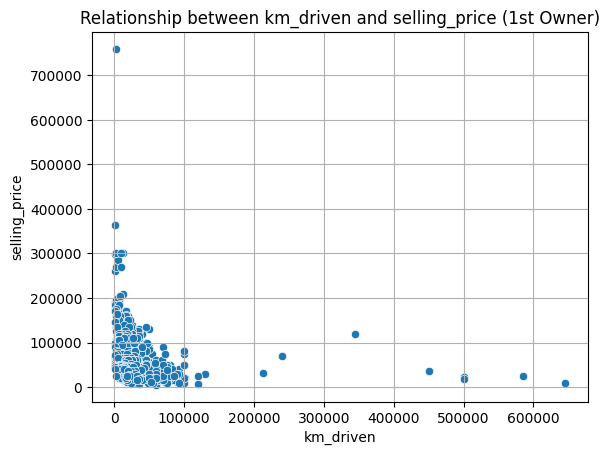

In [482]:
#Question10 What is the relationship between selling_price and km_driven for first-owner?

sns.scatterplot(data=df[df['owner'] == '1st owner'], x='km_driven', y='selling_price')
plt.title("Relationship between km_driven and selling_price (1st Owner)")
plt.grid(True)
plt.show()

In [483]:
#Question11 Identify and remove outliers in the km_driven column using the IQR method.
# Step 1: Calculate Q1 and Q3
Q1 = df["km_driven"].quantile(0.25)
Q3 = df["km_driven"].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter out the outliers
df_clean = df[(df["km_driven"] >= lower_bound) & (df["km_driven"] <= upper_bound)]

print(f"Original dataset size: {df.shape[0]}")
print(f"Cleaned dataset size (outliers removed): {df_clean.shape[0]}")



Original dataset size: 1061
Cleaned dataset size (outliers removed): 1022


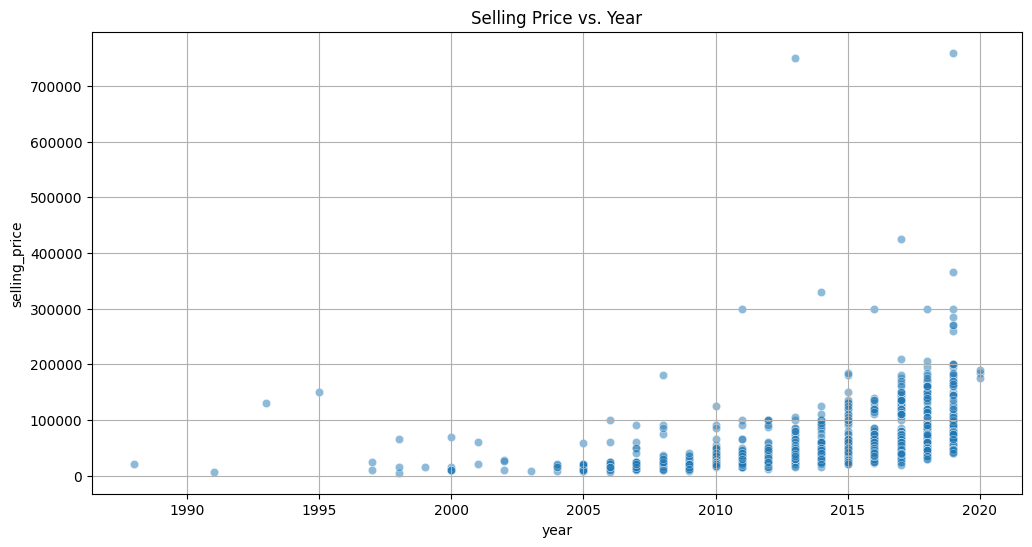

In [484]:
#Question12 Perform a bivariate analysis to visualize the relationship between year and selling_price.

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="year", y="selling_price", alpha=0.5)
plt.title("Selling Price vs. Year")
plt.grid(True)
plt.show()


In [485]:
#Question13 What is the average depreciation in selling price based on the bike's age (current year - manufacturing year?
from datetime import datetime

# Step 1: Calculate bike age
current_year = datetime.now().year
df["bike_age"] = current_year - df["year"]

# Step 2: Group by age and find average selling price
avg_depreciation = df.groupby("bike_age")["selling_price"].mean().sort_index()

# Display result
print(avg_depreciation)


bike_age
5     183333.333333
6     119689.511628
7      87660.374046
8      78894.736842
9      58469.018692
10     56500.000000
11     48668.131868
12     51136.986301
13     35748.400000
14     35655.721311
15     31793.333333
16     22267.857143
17     34289.285714
18     24927.586207
19     23380.000000
20     16978.571429
21     15100.000000
22      8000.000000
23     20666.666667
24     40000.000000
25     20833.333333
26     15000.000000
27     28333.333333
28     17500.000000
30    150000.000000
32    130000.000000
34      6000.000000
37     20000.000000
Name: selling_price, dtype: float64


In [486]:
#Question14 Which bike names are priced significantly above the average price for their manufacturing year?

# Remove duplicate column if present
df.drop(columns='year_avg_price', errors='ignore', inplace=True)

# Calculate year-wise average and merge
df = df.merge(df.groupby("year")["selling_price"].mean().rename("year_avg_price"), on="year")

# Filter and show top 10 overpriced bikes
result = df[df["selling_price"] > 1.3 * df["year_avg_price"]][
    ["name", "year", "selling_price", "year_avg_price"]
].sort_values(by="selling_price", ascending=False).reset_index(drop=True)

print(result.head(10))


                               name  year  selling_price  year_avg_price
0                   Suzuki GSX S750  2019         760000   119689.511628
1        Harley-Davidson Street Bob  2013         750000    51136.986301
2    Kawasaki Ninja 650 [2018-2019]  2017         425000    78894.736842
3                     Yamaha YZF R3  2019         365000   119689.511628
4        Harley-Davidson Street 750  2014         330000    48668.131868
5                        BMW G310GS  2018         300000    87660.374046
6                Kawasaki Ninja 300  2016         300000    58469.018692
7    Kawasaki Ninja 650 [2018-2019]  2011         300000    35655.721311
8  Royal Enfield Continental GT 650  2019         299000   119689.511628
9     Royal Enfield Interceptor 650  2019         285000   119689.511628


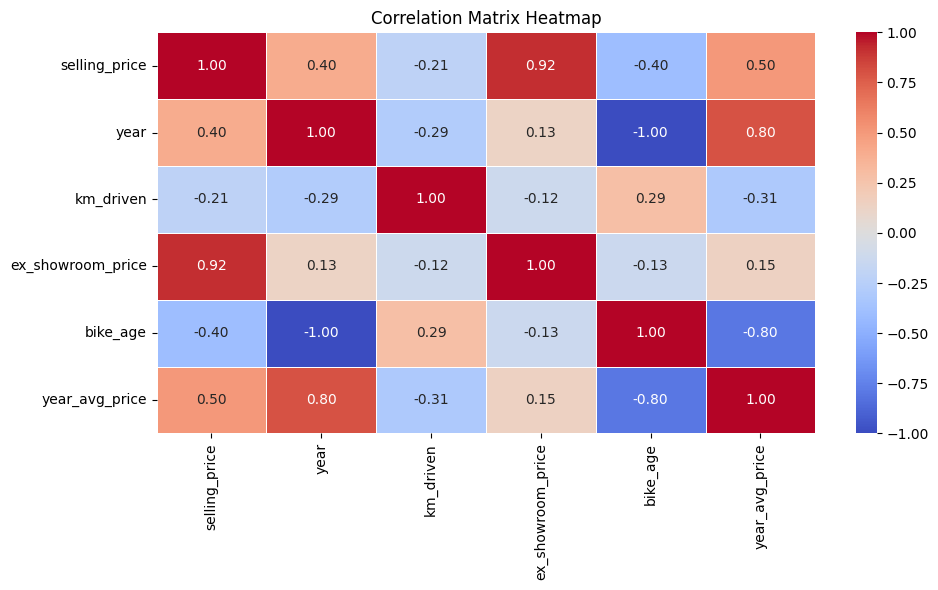

In [487]:
#Question15 Develop a correlation matrix for numeric columns and visualize it using a heatmap.
corr_matrix = df.corr(numeric_only=True)

# Step 2: Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

EDA 2 *CAR SALE*

In [488]:
df = pd.read_csv('Car Sale.csv')

In [489]:
print("Car_id column:")
print(df['Car_id'].sample(5))
df['Date'] = pd.to_datetime(df['Date'])
print("\nDate column:")
print(df['Date'].sample(5))
print("\nCustomer Name column:")
print(df['Customer Name'].sample(5))
print("\nGender column:")
print(df['Gender'].sample(5))
print("\nAnnual Income column:")
print(df['Annual Income'].sample(5))
print("\nDealer_Name column:")
print(df['Dealer_Name'].sample(5))
print("\nCompany column:")
print(df['Company'].sample(5))
print("\nModel column:")
print(df['Model'].sample(5))
print("\nEngine column:")
print(df['Engine'].sample(5))
print("\nTransmission column:")
print(df['Transmission'].sample(5))
print("\nColor column:")
print(df['Color'].sample(5))
print("\nPrice ($) column:")
print(df['Price ($)'].sample(5))
print("\nDealer_No column:")
print(df['Dealer_No '].sample(5))
print("\nBody Style column:")
print(df['Body Style'].sample(5))
print("\nPhone column:")
print(df['Phone'].sample(5))
print("\nDealer_Region column:")
print(df['Dealer_Region'].sample(5))

Car_id column:
14797    C_CND_014798
15630    C_CND_015631
1022     C_CND_001023
6796     C_CND_006797
23448    C_CND_023449
Name: Car_id, dtype: object

Date column:
2305    2022-05-08
8939    2022-11-29
2390    2022-05-12
10019   2022-12-18
12251   2023-03-26
Name: Date, dtype: datetime64[ns]

Customer Name column:
7175      Elian
9847     Alyssa
13931    Kailyn
7140     Dereck
5863       Erin
Name: Customer Name, dtype: object

Gender column:
2483     Male
3177     Male
7139     Male
17265    Male
20419    Male
Name: Gender, dtype: object

Annual Income column:
12824    751000
7613      13500
6651     918000
7748     915000
20039    665000
Name: Annual Income, dtype: int64

Dealer_Name column:
14552            Iceberg Rentals
10179    Clay Johnson Auto Sales
15359              Race Car Help
13805           Saab-Belle Dodge
12088        Hatfield Volkswagen
Name: Dealer_Name, dtype: object

Company column:
18088    Mitsubishi
8920          Acura
8816      Chevrolet
11291         Lexus

In [490]:
df.isna().sum()

,0
Car_id,0
Date,0
Customer Name,1
Gender,0
Annual Income,0
Dealer_Name,0
Company,0
Model,0
Engine,0
Transmission,0


In [491]:
# Check if 'Customer Name' column exists before attempting to drop
if 'Customer Name' in df.columns:
    df.dropna(subset=['Customer Name'], inplace=True)

In [492]:
df.isnull().sum()

,0
Car_id,0
Date,0
Customer Name,0
Gender,0
Annual Income,0
Dealer_Name,0
Company,0
Model,0
Engine,0
Transmission,0


In [493]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [494]:
# Question 1: What is the average selling price of cars for each dealer, and how does it compare across different dealers?

# Calculate the overall average selling price
overall_avg_price = df['Price ($)'].mean()

# Calculate the average selling price per dealer
avg_selling_price_by_dealer = df.groupby('Dealer_Name')['Price ($)'].mean()

# Compare each dealer's average to the overall average
comparison = avg_selling_price_by_dealer - overall_avg_price

print(f"Overall Average Selling Price: ${overall_avg_price:.2f}\n")
print("Difference from Overall Average Selling Price by Dealer:\n")
print(comparison)

Overall Average Selling Price: $28089.54

Difference from Overall Average Selling Price by Dealer:

Dealer_Name
Buddy Storbeck's Diesel Service Inc               -872.278910
C & M Motors Inc                                    22.214727
Capitol KIA                                        100.163349
Chrysler Plymouth                                 -534.014073
Chrysler of Tri-Cities                              33.550582
Classic Chevy                                      512.473974
Clay Johnson Auto Sales                           -273.513359
Diehl Motor CO Inc                                 -95.610986
Enterprise Rent A Car                              223.040327
Gartner Buick Hyundai Saab                         158.080546
Hatfield Volkswagen                               -235.828231
Iceberg Rentals                                    433.418060
McKinney Dodge Chrysler Jeep                      -405.443493
Motor Vehicle Branch Office                       -132.800856
Nebo Chevrolet      

In [495]:
#Question2 Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends.

variation = df.groupby('Company')['Price ($)'].std()
max_variation_company = variation.idxmax()
print(f"Car brand with the highest variation in prices: {max_variation_company}")

#Lincoln’s prices are all over the place, which likely means they sell all kinds of cars — from cheaper ones to luxury models. They’re not just going after one type of buyer. Instead, they seem to be trying to appeal to both regular people and those willing to spend more.

Car brand with the highest variation in prices: Lincoln


In [496]:
#Question 3 What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare


df["Transmission"] = df["Transmission"].str.strip()

trans_stats = df.groupby("Transmission")["Price ($)"].describe()

trans_stats["IQR"] = trans_stats["75%"] - trans_stats["25%"]

print(trans_stats[["25%", "50%", "75%", "IQR"]])


                  25%      50%      75%      IQR
Transmission                                    
Auto          19000.0  24000.0  35500.0  16500.0
Manual        17000.0  22001.0  34000.0  17000.0


In [497]:
#Question 4 What is the distribution of car prices across different regions.

region_stats = df.groupby("Dealer_Region")["Price ($)"].describe()
region_stats["IQR"] = region_stats["75%"] - region_stats["25%"]
print(region_stats[["25%", "50%", "75%", "IQR"]])


                   25%      50%      75%      IQR
Dealer_Region                                    
Aurora         18001.0  23000.0  35000.0  16999.0
Austin         18001.0  23801.0  35001.0  17000.0
Greenville     18001.0  22500.0  34500.0  16499.0
Janesville     18001.0  23000.0  34000.0  15999.0
Middletown     18000.0  22750.0  34000.0  16000.0
Pasco          18500.5  23000.0  34000.0  15499.5
Scottsdale     18000.0  22600.0  33500.0  15500.0


In [498]:
#Question5 What is the distribution of cars based on body styles

body_style_counts = df["Body Style"].value_counts()
print(body_style_counts)

Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2970
Name: count, dtype: int64


In [499]:
#Question6 How does the average selling price of cars vary by customer gender and annual income?

gender_income_stats = df.groupby(["Gender", "Annual Income"])["Price ($)"].mean()
print(gender_income_stats)


Gender  Annual Income
Female  13500            28132.038732
        106000           46001.000000
        121000           20000.000000
        190000           19001.000000
        211000           51000.000000
                             ...     
Male    6600000          39000.000000
        6800000          15000.000000
        7650000          21000.000000
        8000000          85000.000000
        11200000         26001.000000
Name: Price ($), Length: 3442, dtype: float64


In [500]:
#Question7 What is the distribution of car prices by region, and how does the number of cars sold vary by region.


df["Dealer_Region"] = df["Dealer_Region"].str.strip()

region_stats = df.groupby("Dealer_Region")["Price ($)"].describe()

print(region_stats[["25%", "50%", "75%"]])

cars_sold_by_region = df['Dealer_Region'].value_counts()

print("\nNumber of Cars Sold by Region:\n")
print(cars_sold_by_region)


                   25%      50%      75%
Dealer_Region                           
Aurora         18001.0  23000.0  35000.0
Austin         18001.0  23801.0  35001.0
Greenville     18001.0  22500.0  34500.0
Janesville     18001.0  23000.0  34000.0
Middletown     18000.0  22750.0  34000.0
Pasco          18500.5  23000.0  34000.0
Scottsdale     18000.0  22600.0  33500.0

Number of Cars Sold by Region:

Dealer_Region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3129
Greenville    3128
Middletown    3128
Name: count, dtype: int64


In [501]:
#Question8 How does the average car price differ between cars with different engine sizes.

engine_price_stats = df.groupby("Engine")["Price ($)"].mean()
print(engine_price_stats)

Engine
DoubleÂ Overhead Camshaft    28247.193317
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


In [502]:
#Question9  How do car prices vary based on the customer’s annual income bracket.

income_price_stats = df.groupby("Annual Income")["Price ($)"].mean()
print(income_price_stats)

Annual Income
10080       22801.000000
13500       27878.981415
24000       61001.000000
85000       43000.000000
106000      46001.000000
                ...     
6600000     39000.000000
6800000     15000.000000
7650000     21000.000000
8000000     85000.000000
11200000    26001.000000
Name: Price ($), Length: 2508, dtype: float64


Model
Diamante      418
Prizm         411
Silhouette    411
Passat        391
Jetta         382
Name: Price ($), dtype: int64


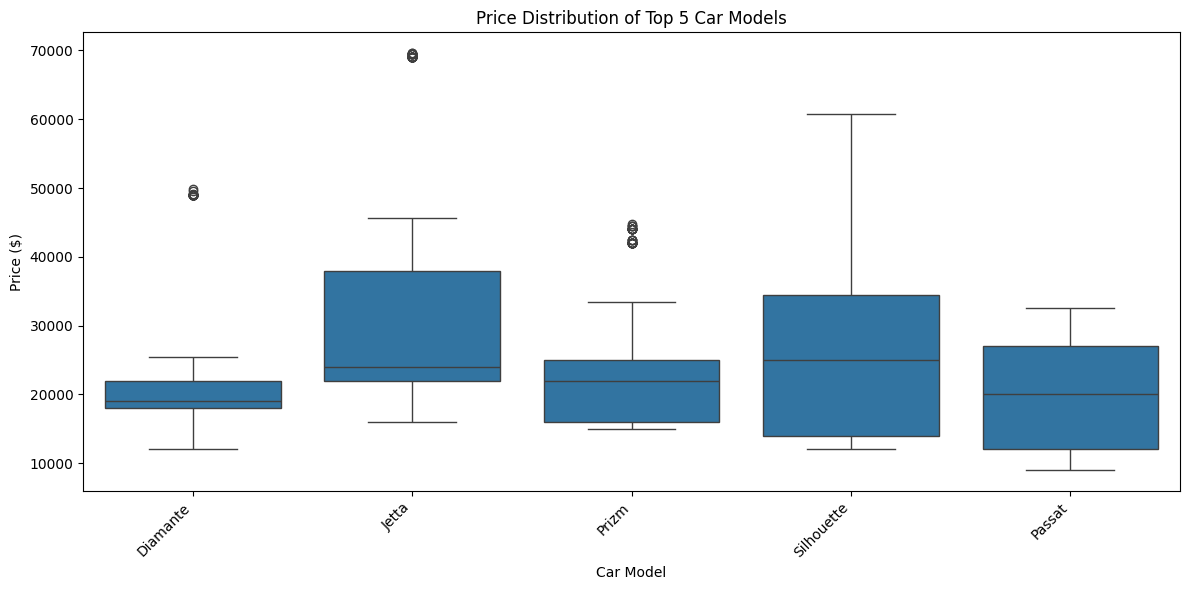

In [503]:
#Question10 What are the top 5 car models with the highest number of sales, and how does their price distribution look.

top_models = df.groupby("Model")["Price ($)"].count().sort_values(ascending=False)[:5]
print(top_models)

# Filter the original DataFrame to include only the top models
df_top_models = df[df['Model'].isin(top_models.index)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_models, x='Model', y='Price ($)')
plt.title('Price Distribution of Top 5 Car Models')
plt.xlabel('Car Model')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [504]:
#Question 11 How does car price vary with engine size across different car colors, and which colors have the highest price variation.

color_engine_price_stats = df.groupby(["Color", "Engine"])["Price ($)"].std().sort_values(ascending=False)
print("Price Variation (Standard Deviation) by Color and Engine:\n")
print(color_engine_price_stats)
# Identify the color with the highest price variation
color_highest_variation = color_engine_price_stats.index[0]
print(f"\nColor with the highest price variation: {color_highest_variation}")

Price Variation (Standard Deviation) by Color and Engine:

Color       Engine                   
Black       Overhead Camshaft            17457.405345
Red         Overhead Camshaft            17346.642554
Pale White  DoubleÂ Overhead Camshaft    14402.370508
Red         DoubleÂ Overhead Camshaft    13499.354247
Pale White  Overhead Camshaft            13000.103061
Black       DoubleÂ Overhead Camshaft    12418.674126
Name: Price ($), dtype: float64

Color with the highest price variation: ('Black', 'Overhead Camshaft')


Monthly Car Sales:

Sale_Month
2022-01     315
2022-02     320
2022-03     705
2022-04     800
2022-05     750
2022-06     690
2022-07     700
2022-08     810
2022-09    1475
2022-10     835
2022-11    1619
2022-12    1625
2023-01     475
2023-02     415
2023-03     830
2023-04     855
2023-05    1145
2023-06    1025
2023-07    1025
2023-08     895
2023-09    1830
2023-10     995
2023-11    1850
2023-12    1921
Freq: M, Name: count, dtype: int64


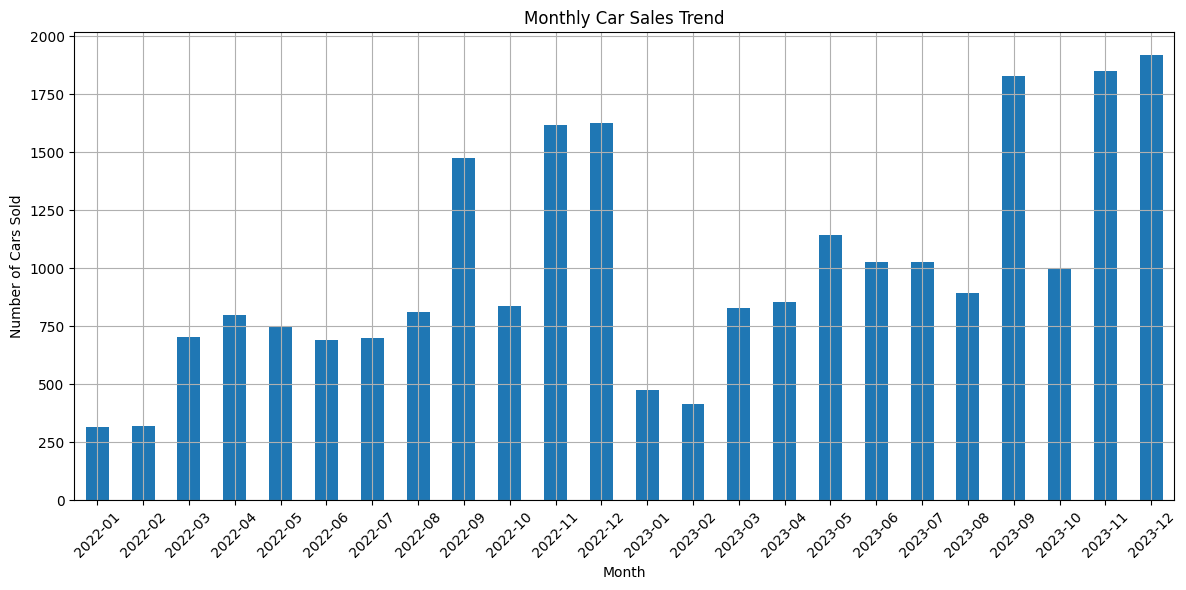

In [505]:
#Question12 Is there any seasonal trend in car sales based on the date of sale.

# Extract month and year from the 'Date' column
df['Sale_Month'] = df['Date'].dt.to_period('M')

# Count the number of sales per month
monthly_sales = df['Sale_Month'].value_counts().sort_index()

print("Monthly Car Sales:\n")
print(monthly_sales)

# Visualize the monthly sales trend
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar')
plt.title('Monthly Car Sales Trend')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# he car sales data shows a strong seasonal trend with sales peaking in September, November, and December of both 2022 and 2023.

In [506]:
#Question13 How does the car price distribution change when considering different combinations of body style and transmission type.

price_distribution_by_style_trans = df.groupby(['Body Style', 'Transmission'])['Price ($)'].describe()

print("Price Distribution by Body Style and Transmission Type:\n")
print(price_distribution_by_style_trans[["25%","50%","75%"]])


Price Distribution by Body Style and Transmission Type:

                             25%      50%      75%
Body Style Transmission                           
Hardtop    Auto          21001.0  27000.0  42500.0
           Manual        17575.5  22001.0  29000.0
Hatchback  Auto          18001.0  21500.0  31000.0
           Manual        17000.0  23000.0  36001.0
Passenger  Auto          19000.0  25000.0  38000.0
           Manual        16001.0  22000.0  37000.0
SUV        Auto          19000.0  25000.0  33000.0
           Manual        17000.0  22000.0  28000.0
Sedan      Auto          19000.0  26000.0  39500.0
           Manual        19001.0  25000.0  36600.0


In [507]:
#Question14 What is the correlation between car price, engine size, and annual income of customers, and how do these features interact.

In [508]:
#Question15 How does the average car price vary across different car models and engine types?

# Group by Model and Engine and calculate the average Price
average_price_by_model_engine = df.groupby(['Model', 'Engine'])['Price ($)'].mean()

print(average_price_by_model_engine)

Model     Engine                   
3-Sep     DoubleÂ Overhead Camshaft    37986.380117
3000GT    DoubleÂ Overhead Camshaft    22764.326923
          Overhead Camshaft            21770.659864
300M      DoubleÂ Overhead Camshaft    21394.888889
323i      DoubleÂ Overhead Camshaft    16744.632287
                                           ...     
Windstar  Overhead Camshaft            17100.272727
Wrangler  DoubleÂ Overhead Camshaft    21145.294737
          Overhead Camshaft            18742.942029
Xterra    DoubleÂ Overhead Camshaft    15940.459459
          Overhead Camshaft            31072.500000
Name: Price ($), Length: 261, dtype: float64


EDA 3 AMAZON SALE


In [509]:
df = pd.read_csv('amazon.csv')

In [510]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [511]:
df.head(5)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [512]:
df.isna().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,2
about_product,0
user_id,0


In [513]:

# Remove commas and convert to numeric, coercing errors to NaN
df['rating_count'] = df['rating_count'].astype(str).str.replace(',', '', regex=False)
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

# Now calculate the mean (will be float due to NaNs)
missing_rating = df['rating_count'].mean()

# Fill missing values with the calculated mean
df['rating_count'].fillna(missing_rating, inplace=True)

print("Missing values in 'rating_count' after filling:")
print(df['rating_count'].isnull().sum())

Missing values in 'rating_count' after filling:
0


In [514]:
df.sample()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1309,B0BPJBTB3F,Khaitan ORFin Fan heater for Home and kitchen-...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...","₹1,299","₹2,495",48%,2,2.0,Khaitan Orfin Fan heater for Home and kitchen|...,"AGHT3K4KSG5MAQUSXRDT5VNB73GA,AE4Q5XQ7SZW35EEUJ...","Manidipa Sengupta,Vidisha","R1OO2ED6615EX1,RR4S5JTJMCPA5","Bad quality,Amazing product..",The heating capacity is zero .Moreover i have ...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Khaitan-ORFin-heater-Hom...


In [515]:
df.isna().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,0
about_product,0
user_id,0


In [516]:
# Ensure the columns are treated as strings before replacing characters, then convert to numeric
df['discounted_price'] = df['discounted_price'].astype(str).str.replace('₹', '').str.replace(',', '')
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')

df['actual_price'] = df['actual_price'].astype(str).str.replace('₹', '').str.replace(',', '')
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')


# Check the data types of the cleaned columns
print("Data types after cleaning and conversion:")
print(df[['discounted_price', 'actual_price', 'rating_count']].dtypes)

# Display sample values from the cleaned columns
print("\nSample values from cleaned and converted columns:")
display(df[['discounted_price', 'actual_price', 'rating_count']].sample(5))

Data types after cleaning and conversion:
discounted_price    float64
actual_price        float64
rating_count        float64
dtype: object

Sample values from cleaned and converted columns:


,discounted_price,actual_price,rating_count
1312,2399.0,4200.0,397.0
676,1109.0,2800.0,53464.0
151,339.0,1099.0,974.0
1239,1599.0,1999.0,1558.0
187,379.0,1099.0,2806.0


In [517]:
# Convert the 'rating' column to numeric, coercing errors
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Check the data type after conversion
print("Data type of the 'rating' column after conversion:")
print(df['rating'].dtypes)


Data type of the 'rating' column after conversion:
float64


In [518]:
df.duplicated().sum()

np.int64(0)

In [519]:
df.head(4)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64%,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43%,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90%,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53%,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...


In [520]:
# Clean and convert 'discount_percentage'
# Remove the '%' sign and convert to numeric (float)
df['discount_percentage'] = df['discount_percentage'].astype(str).str.replace('%', '')
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')


In [521]:
df.sample()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
5,B08Y1TFSP6,pTron Solero TB301 3A Type-C Data and Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,149.0,1000.0,85,3.9,24871.0,Fast Charging & Data Sync: Solero TB301 Type-C...,"AEQ2YMXSZWEOHK2EHTNLOS56YTZQ,AGRVINWECNY7323CW...","Jayesh,Rajesh k.,Soopy,amazon customer,Aman,Sh...","R7S8ANNSDPR40,R3CLZFLHVJU26P,RFF7U7MPQFUGR,R1M...","It's pretty good,Average quality,very good and...","It's a good product.,Like,Very good item stron...",https://m.media-amazon.com/images/I/31wOPjcSxl...,https://www.amazon.in/Solero-TB301-Charging-48...


In [522]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [523]:
#Question1 What is the average rating for each product category.

avg_rating_by_category = df.groupby('category')['rating'].mean()
# Display the average rating by category
print("Average rating for each product category:")
print(avg_rating_by_category)

Average rating for each product category:
category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           4.050000
                                                                                                                            ...   
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens        4.250000
OfficeProducts|OfficePaperProduc

In [524]:
#Question2 What are the top rating_count products by category.

top_rating_count_by_category = df.groupby('category')['rating_count'].idxmax()[:5]

# Display the top rating_count products by category
print("Top rating_count products by category:")
print(top_rating_count_by_category)

Top rating_count products by category:
category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                1157
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                695
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets        906
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones     748
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers        844
Name: rating_count, dtype: int64


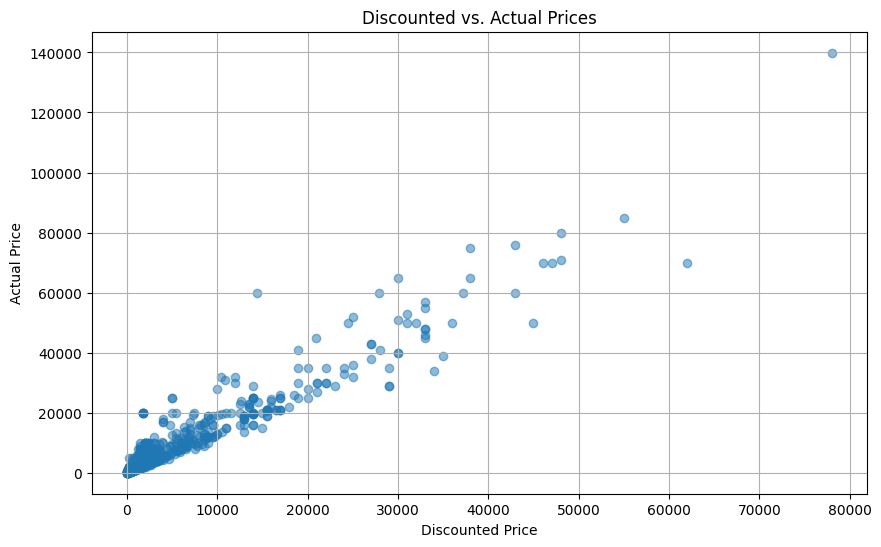

In [525]:
#Question3 What is the distribution of discounted prices vs. actual prices.

plt.figure(figsize=(10, 6))
plt.scatter(df['discounted_price'], df['actual_price'],alpha = 0.5)
plt.title('Discounted vs. Actual Prices')
plt.xlabel('Discounted Price')
plt.ylabel('Actual Price')
plt.grid(True)

Average discount percentage by category:
category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    42.0
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   78.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           35.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        56.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           46.5
                                                                                                                          ... 
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens         0.0
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Penc

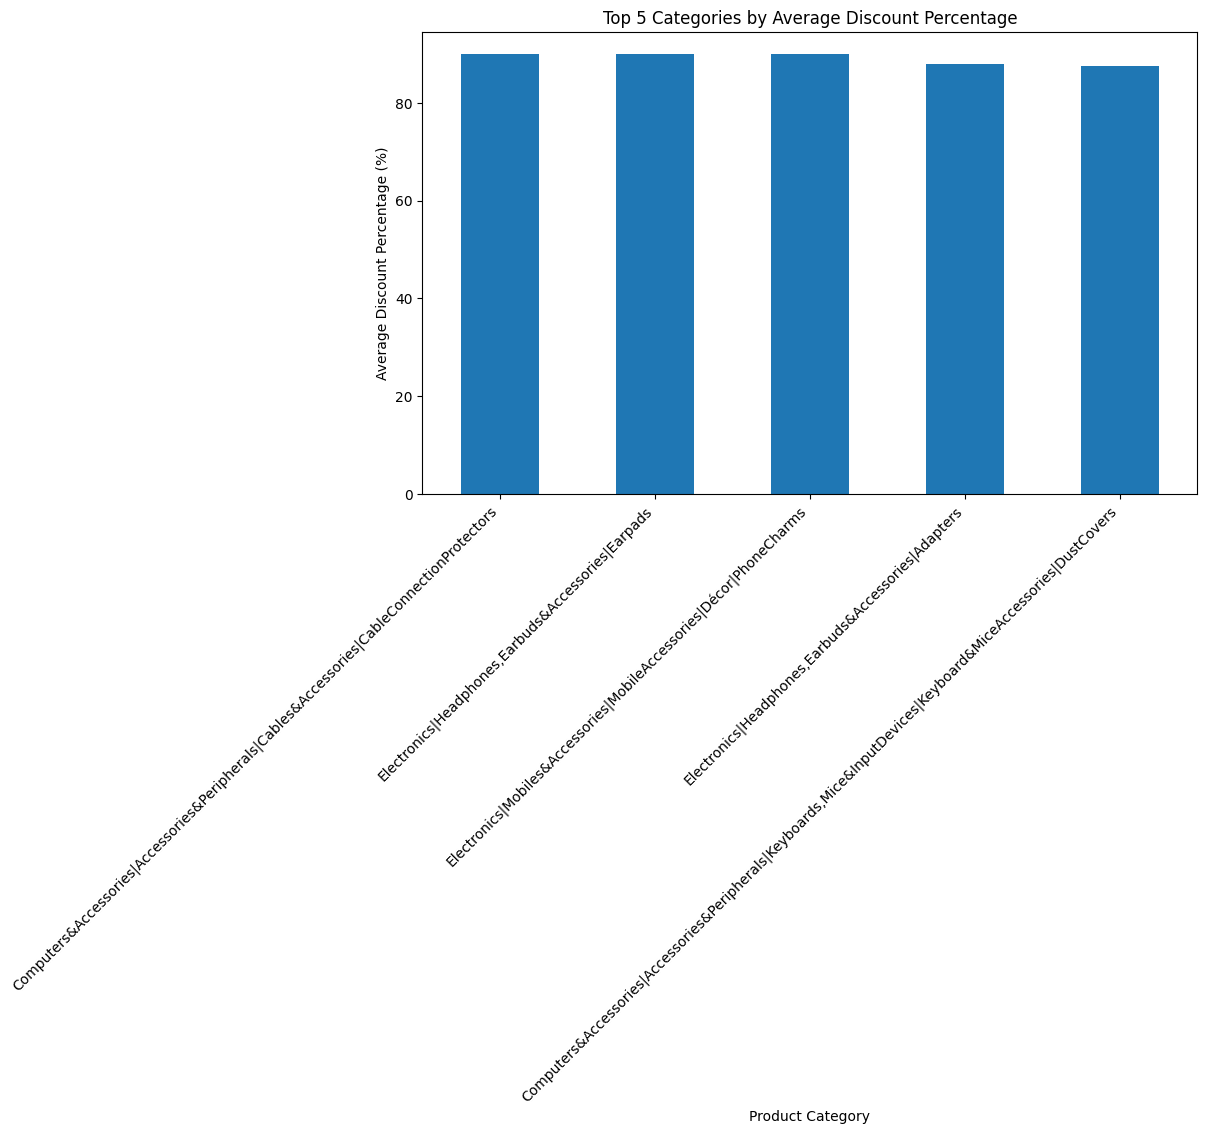

In [526]:
#Question4  How does the average discount percentage vary across categories.

avg_discount_by_category = df.groupby('category')['discount_percentage'].mean()
# Display the average discount percentage by category
print("Average discount percentage by category:")
print(avg_discount_by_category)

#visualizing the data

top_5_avg_discount_categories = avg_discount_by_category.sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
top_5_avg_discount_categories.plot(kind='bar')
plt.title('Top 5 Categories by Average Discount Percentage')
plt.xlabel('Product Category')
plt.ylabel('Average Discount Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Most popular product names:
product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution     5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating              4
Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)                               3
Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black    3
Flix Micro Usb Cable For Smartphone (Black)                                                                                                                   3
Name: count, dtype: int64


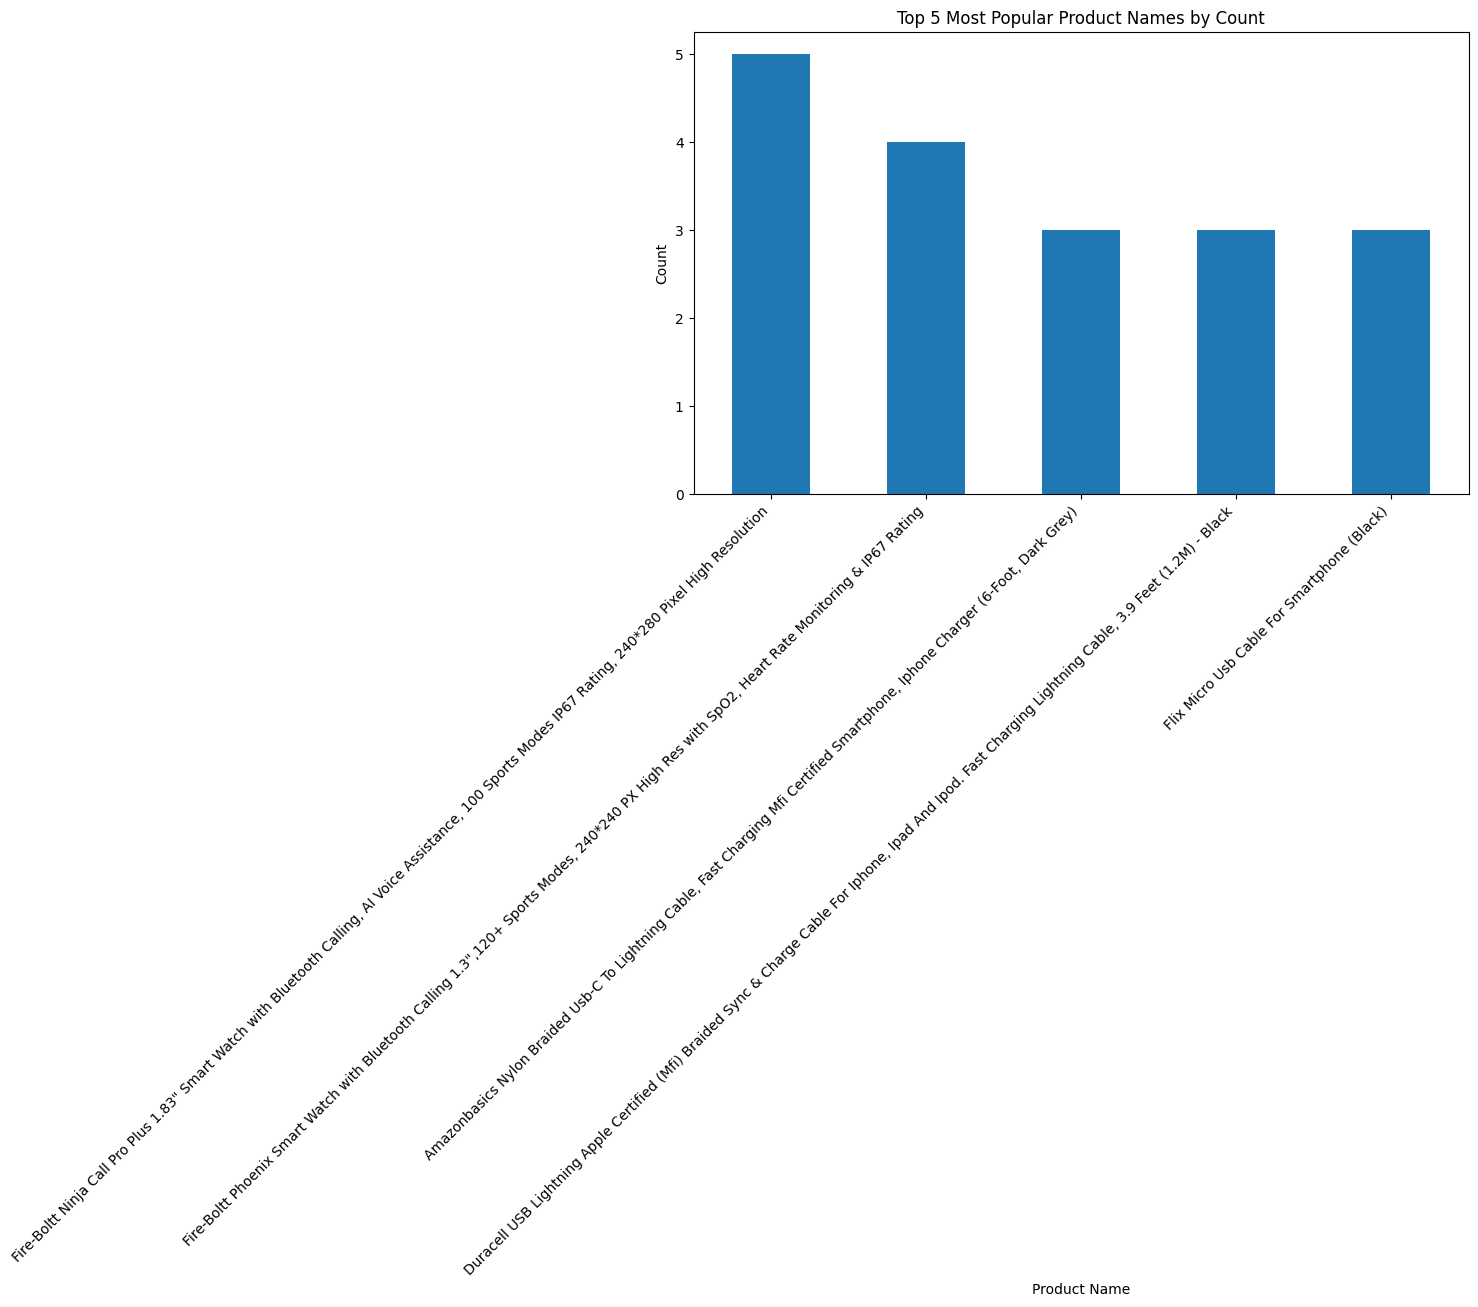

In [527]:
#Question5 What are the most popular product names.

popular_products = df['product_name'].value_counts().head(5)
# Display the most popular product names
print("Most popular product names:")
print(popular_products)

plt.figure(figsize=(10, 6))
popular_products.plot(kind='bar')
plt.title('Top 5 Most Popular Product Names by Count')
plt.xlabel('Product Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout() #
plt.show()

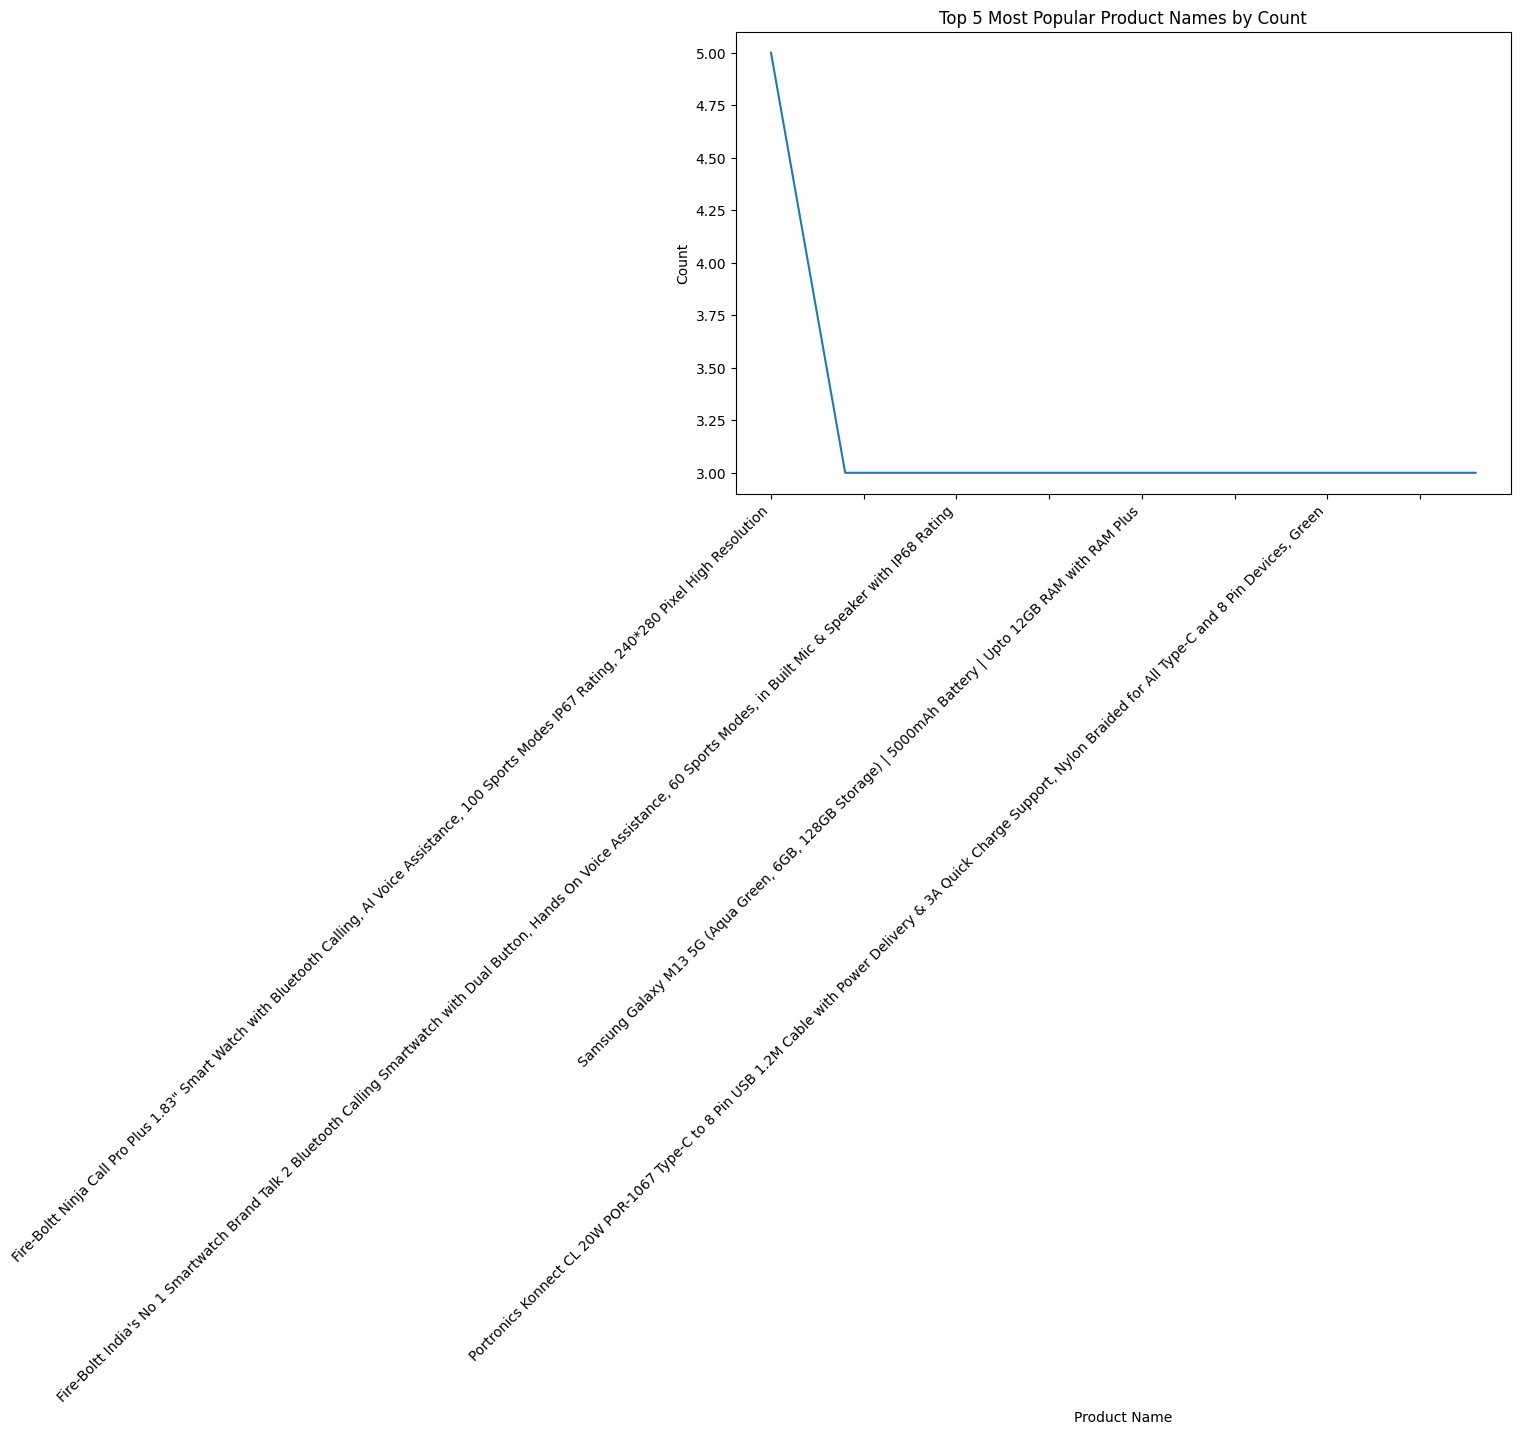

In [528]:
#Question6 What are the most popular product keywords.

# Find the value counts for product names to get popular products
popular_products = df['product_name'].value_counts().head(20)


plt.figure(figsize=(10, 6))
popular_products.plot(kind='line')
plt.title('Top 5 Most Popular Product Names by Count')
plt.xlabel('Product Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [529]:
#QUestion7 What are the most popular product reviews.

popular_reviews = df['rating'].value_counts().head(5)
# Display the most popular product reviews
print("Most popular product reviews:")
print(popular_reviews)

Most popular product reviews:
rating
4.1    244
4.3    230
4.2    228
4.0    181
3.9    123
Name: count, dtype: int64


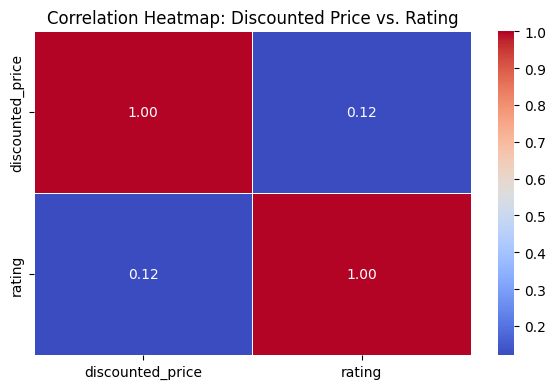

In [530]:
#Question8  What is the correlation between discounted_price and rating.

correlation_columns = df[['discounted_price', 'rating']]

# Calculate the correlation matrix for these two columns
correlation_matrix = correlation_columns.corr()

# Plot the heatmap
plt.figure(figsize=(6, 4)) # Adjust figure size for a smaller matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap: Discounted Price vs. Rating")
plt.tight_layout()
plt.show()


In [531]:
#Question9  What are the Top 5 categories based on the highest ratings.

top_5_categories_by_rating = avg_rating_by_category.sort_values(ascending=False).head(5)

print("Top 5 categories based on the highest average ratings:")
print(top_5_categories_by_rating)


Top 5 categories based on the highest average ratings:
category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Computers&Accessories|Components|Memory                                     4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64


In [532]:
#Question10  Identify any potential areas for improvement or optimization based on the data analysis.

#Area 1: Categories with low ratings but high discounts - indicates potential product quality/satisfaction issues despite price reductions.

EDA 4 SPOTIFY DATA


In [533]:
import pandas as pd
df = pd.read_csv('spotify.csv')

In [534]:
df.sample()

,Artist,Track Name,Popularity,Duration (ms),Track ID
66,Lil Wayne,Mirror,77,228093,5hUYsaOyMY32yjRXeuQwGj


In [535]:
df['Duration_minutes'] = df['Duration (ms)']

In [536]:
df.drop('Duration (ms)', axis=1, inplace=True)

In [537]:
#Question1 Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.
# Check for missing values

print("Missing values per column:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)



Missing values per column:
Artist              0
Track Name          0
Popularity          0
Track ID            0
Duration_minutes    0
dtype: int64

Number of duplicate rows:
27


In [538]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Track ID', 'Duration_minutes'], dtype='object')

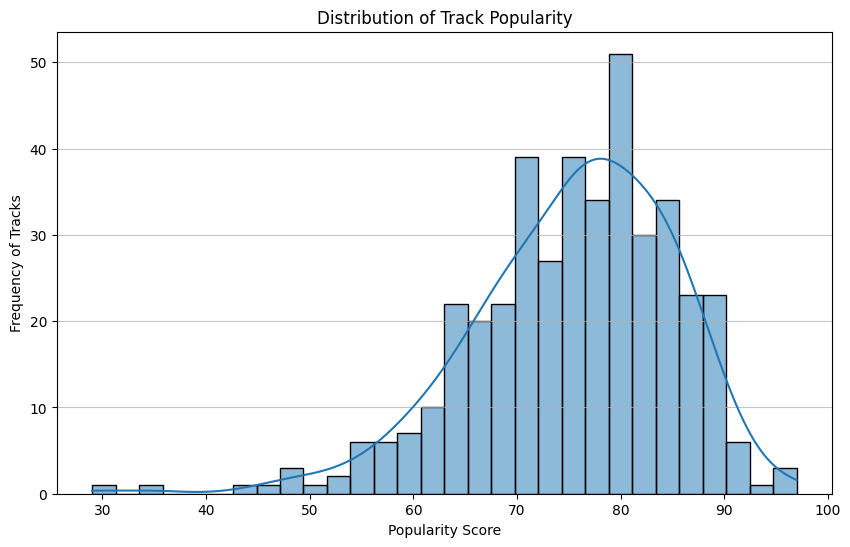

In [539]:
#Question2 What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

# Plot a histogram of the 'Popularity' column (representing track popularity)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Popularity', bins=30, kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency of Tracks')
plt.grid(axis='y', alpha=0.75)
plt.show()

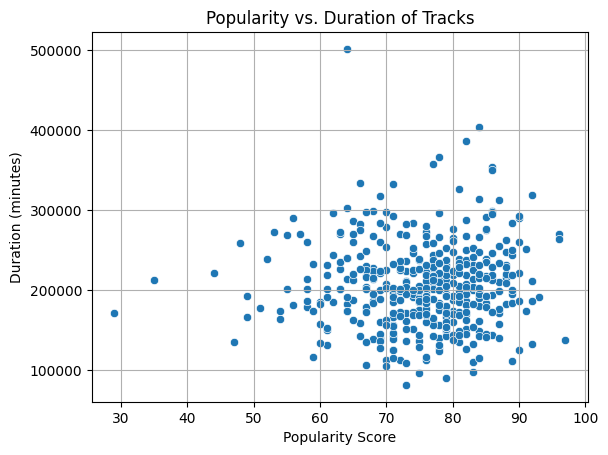

In [540]:
#Question 3  Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plots.

sns.scatterplot(data=df, x='Popularity', y='Duration_minutes')
plt.title('Popularity vs. Duration of Tracks')
plt.xlabel('Popularity Score')
plt.ylabel('Duration (minutes)')
plt.grid(True)
plt.show()

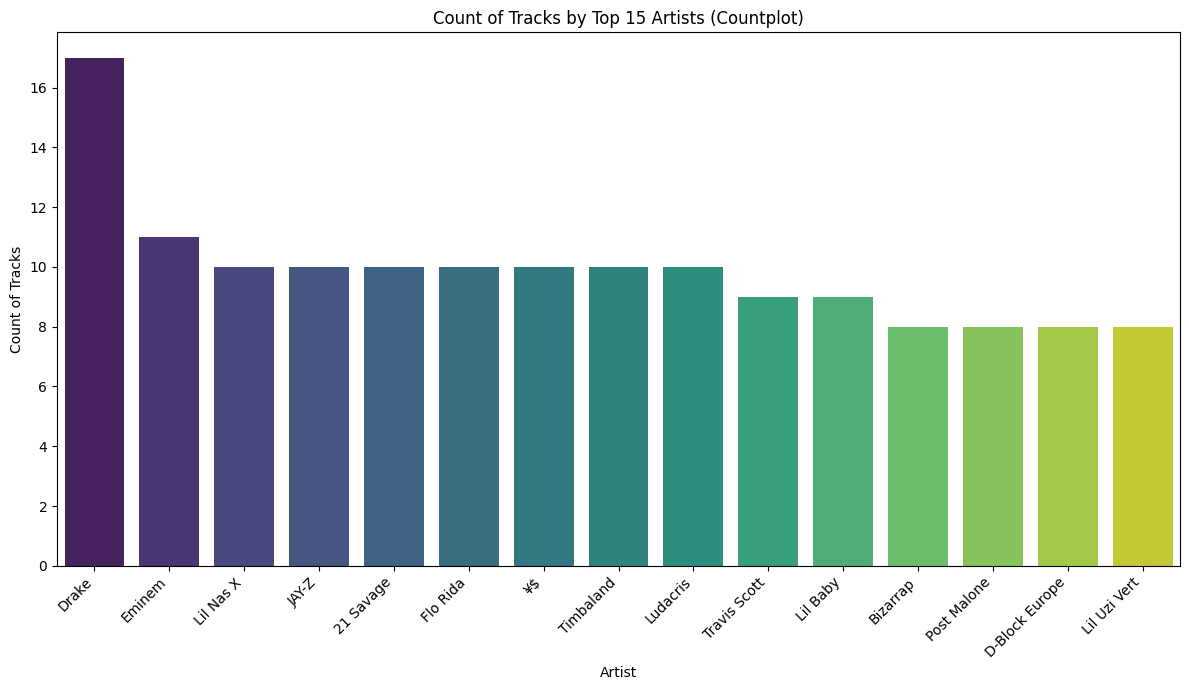

In [541]:
# Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot

# Get the count of tracks for each artist
artist_track_counts = df['Artist'].value_counts()

# Select the top N artists for the plot (e.g., top 15)
top_n_artists = 15
top_artists_counts = artist_track_counts.head(top_n_artists)

# Filter the DataFrame to include only tracks by the top artists
df_top_artists = df[df['Artist'].isin(top_artists_counts.index)]

# Create a countplot for the top artists
plt.figure(figsize=(12, 7)) # Increased figure size
sns.countplot(data=df_top_artists, x='Artist', order=top_artists_counts.index, palette='viridis') # Use 'order' to maintain the order by count
plt.title(f'Count of Tracks by Top {top_n_artists} Artists (Countplot)')
plt.xlabel('Artist')
plt.ylabel('Count of Tracks')
plt.xticks(rotation=45, ha='right') # Rotate labels
plt.tight_layout() # Adjust layout
plt.show()

In [542]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Track ID', 'Duration_minutes'], dtype='object')

In [543]:
#Question 5 What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each

least_popular_tracks = df.nsmallest(5, 'Popularity')
print("Top 5 Least Popular Tracks:")
print(least_popular_tracks[['Artist', 'Track Name', 'Popularity']])

Top 5 Least Popular Tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [544]:
#Question 6 Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.

top_artists = df['Artist'].value_counts().head(5)
avg_popularity = df[df['Artist'].isin(top_artists.index)].groupby('Artist')['Popularity'].mean()

print("Average Popularity for Top 5 Artists (by track count):")
print(avg_popularity)

top_artist = avg_popularity.idxmax()
top_score = avg_popularity.max()

print(f"\nAmong the top 5 artists (by track count), the artist with the highest average popularity is '{top_artist}' with an average popularity of {top_score:.2f}.")



Average Popularity for Top 5 Artists (by track count):
Artist
21 Savage    83.800000
Drake        82.882353
Eminem       83.636364
JAY-Z        77.900000
Lil Nas X    75.900000
Name: Popularity, dtype: float64

Among the top 5 artists (by track count), the artist with the highest average popularity is '21 Savage' with an average popularity of 83.80.


In [545]:
#Question 7 For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.


print("Most popular track for each of the top 5 artists (by track count):")

for artist in top_5_artists_by_tracks:
    track = df[df['Artist'] == artist].sort_values('Popularity', ascending=False).iloc[0]
    print(f"Artist: {artist}")
    print(f"  Most Popular Track: {track['Track Name']} (Popularity: {track['Popularity']})")



Most popular track for each of the top 5 artists (by track count):
Artist: Drake
  Most Popular Track: Rich Baby Daddy (feat. Sexyy Red & SZA) (Popularity: 92)
Artist: Eminem
  Most Popular Track: Without Me (Popularity: 90)
Artist: Lil Nas X
  Most Popular Track: THATS WHAT I WANT (Popularity: 81)
Artist: JAY-Z
  Most Popular Track: Ni**as In Paris (Popularity: 86)
Artist: 21 Savage
  Most Popular Track: redrum (Popularity: 96)


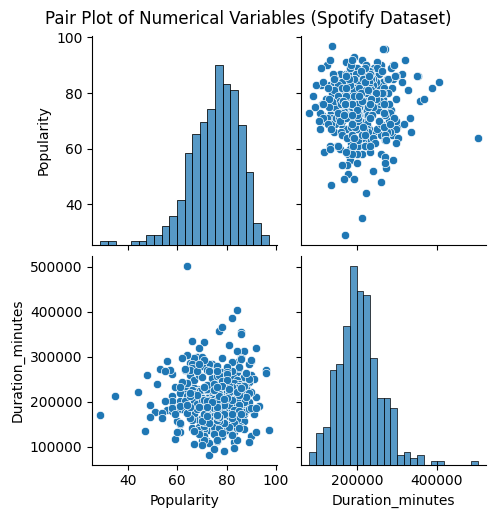

In [546]:
#Question 8 Visualize relationships between multiple numerical variables simultaneously using a pair plot.
# Select the numerical columns for the pair plot
numerical_cols = ['Popularity', 'Duration_minutes']

# Create a pair plot
sns.pairplot(df[numerical_cols])
plt.suptitle('Pair Plot of Numerical Variables (Spotify Dataset)', y=1.02)
plt.show()


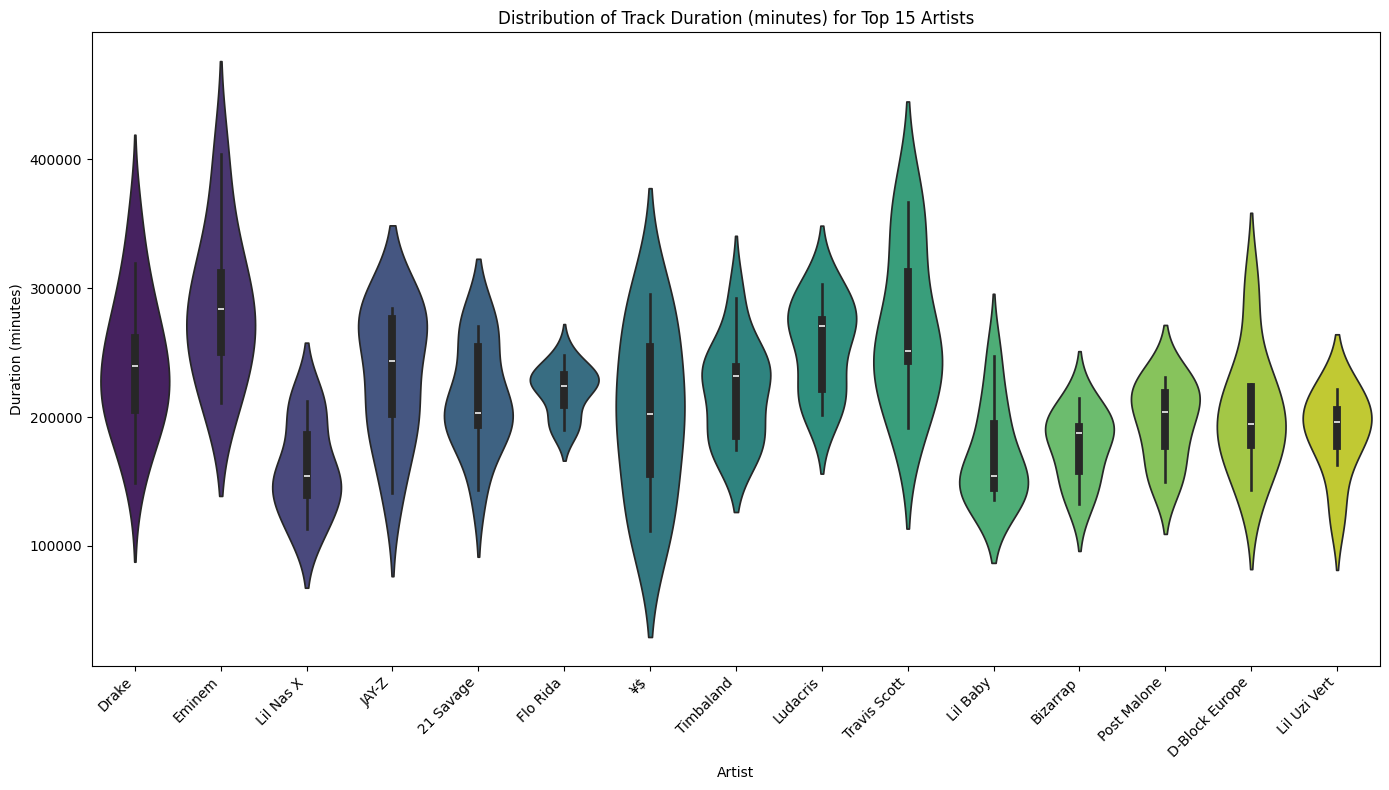

In [547]:
#Question  9  Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot

df_top_artists = df[df['Artist'].isin(top_artists_counts.index)]

# Create a box plot of track duration by artist for the top artists
plt.figure(figsize=(14, 8))
sns.violinplot(data=df_top_artists, x='Artist', y='Duration_minutes', order=top_artists_counts.index, palette='viridis')
plt.title(f'Distribution of Track Duration (minutes) for Top {top_n_artists} Artists')
plt.xlabel('Artist')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45, ha='right') # Rotate labels
plt.tight_layout() # Adjust layout
plt.show()


#  yes, the duration of tracks shows some variation among different artists, with some having noticeably shorter or longer typical song lengths and differing spreads of durations.

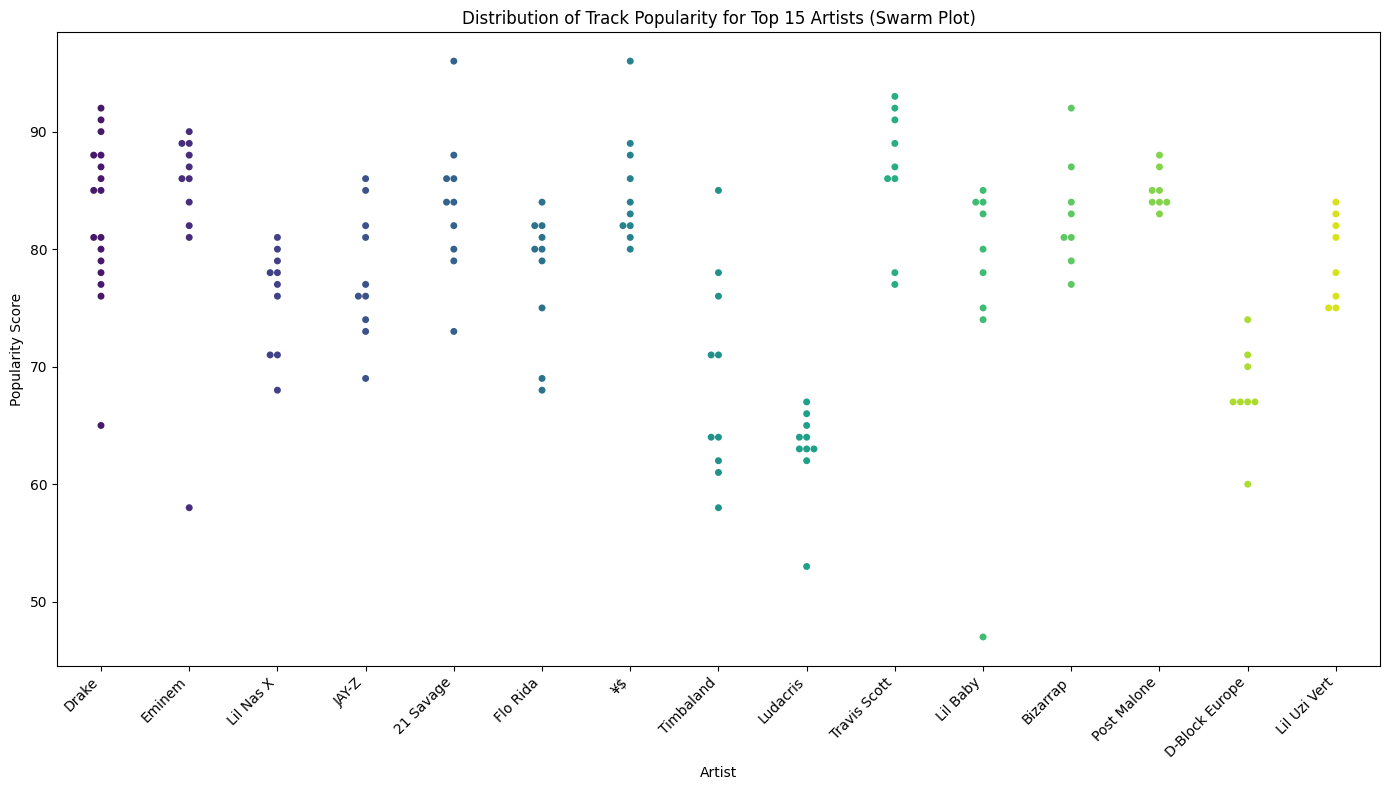

In [548]:
#Question10 How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

# Filter the DataFrame to include only tracks by the top artists
df_top_artists = df[df['Artist'].isin(top_artists_counts.index)]

# Create a swarm plot of track popularity by artist for the top artists
plt.figure(figsize=(14, 8)) # Adjust figure size
sns.swarmplot(data=df_top_artists, x='Artist', y='Popularity', order=top_artists_counts.index, palette='viridis', size=5) # size adjusts point size
plt.title(f'Distribution of Track Popularity for Top {top_n_artists} Artists (Swarm Plot)')
plt.xlabel('Artist')
plt.ylabel('Popularity Score')
plt.xticks(rotation=45, ha='right') # Rotate labels
plt.tight_layout() # Adjust layout
plt.show()